## Modeling

In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import math
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.tree import plot_tree
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.linear_model import LassoCV, LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.neighbors import KNeighborsClassifier

color = '#5D7963'
#warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the data
county_aggr = pd.read_csv('../csv_data/county_aggr.csv')

In [3]:
county_aggr.head(2)

,Unnamed: 0,State,County,CensusTract,Pop2010,OHU2010,PovertyRate,MedianFamilyIncome,LowIncomeTracts,LILATracts_1And10,...,TractAsian,TractHispanic,PctHUNV,PctKids,PctSeniors,PctWhite,PctBlack,PctAsian,PctHispanic,is_food_desert
0,0,Alabama,Autauga County,1001020100,54571,20221,16.130786,69337.500000,5,5,...,474.0,1310.0,5.889916,26.777959,11.995382,78.530721,17.670558,0.868593,2.400542,1
1,1,Alabama,Baldwin County,1003010100,182265,73180,11.845546,72665.741935,7,4,...,1348.0,7992.0,3.696365,22.987408,16.771185,85.673607,9.384687,0.739582,4.384824,1


In [4]:
county_aggr = county_aggr.loc[:, ~county_aggr.columns.str.contains('^Unnamed')]

In [5]:
county_aggr.head(2)

,State,County,CensusTract,Pop2010,OHU2010,PovertyRate,MedianFamilyIncome,LowIncomeTracts,LILATracts_1And10,LALOWI1_10,...,TractAsian,TractHispanic,PctHUNV,PctKids,PctSeniors,PctWhite,PctBlack,PctAsian,PctHispanic,is_food_desert
0,Alabama,Autauga County,1001020100,54571,20221,16.130786,69337.500000,5,5,7105.688803,...,474.0,1310.0,5.889916,26.777959,11.995382,78.530721,17.670558,0.868593,2.400542,1
1,Alabama,Baldwin County,1003010100,182265,73180,11.845546,72665.741935,7,4,14465.970897,...,1348.0,7992.0,3.696365,22.987408,16.771185,85.673607,9.384687,0.739582,4.384824,1


In [6]:
county_aggr.columns

Index(['State', 'County', 'CensusTract', 'Pop2010', 'OHU2010', 'PovertyRate',
       'MedianFamilyIncome', 'LowIncomeTracts', 'LILATracts_1And10',
       'LALOWI1_10', 'TractSNAP', 'TractHUNV', 'lapop1', 'lapop10',
       'TractKids', 'TractSeniors', 'TractWhite', 'TractBlack', 'TractAsian',
       'TractHispanic', 'PctHUNV', 'PctKids', 'PctSeniors', 'PctWhite',
       'PctBlack', 'PctAsian', 'PctHispanic', 'is_food_desert'],
      dtype='object')

In [7]:
X = county_aggr.drop(['State', 'County', 'is_food_desert', 'LowIncomeTracts', 'LILATracts_1And10', 'LALOWI1_10'], axis=1)
y = county_aggr['is_food_desert']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic regression

In [9]:
# Selecting numeric features
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns

# Selecting categorical features
categorical_features = X_train.select_dtypes(include=['object']).columns


In [10]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [11]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [12]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [13]:
# Define the model pipeline with imputer
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [14]:
#fit the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['CensusTract', 'Pop2010', 'OHU2010', 'PovertyRate',
       'MedianFamilyIncome', 'TractSNAP', 'TractHUNV', 'lapop1', 'lapop10',
       'TractKids', 'TractSeniors', 'TractWhite', 'TractBlack', 'TractAsian',
       'TractHispanic', 'PctHUNV', 'PctKids', 'PctSeniors', 'PctWhite',
       'PctBlack', 'PctAsian', 'PctHispanic'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [15]:
# Preprocess the training and testing data using the preprocessor defined earlier
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [16]:
# Standardizing numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_processed)
X_test_scaled = scaler.transform(X_test_processed)

In [17]:
# Random Forest Feature Importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [18]:
# Univariate Feature Selection
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
selected_features_indices = selector.get_support(indices=True)
selected_features = X_train.columns[selected_features_indices]

In [19]:
selected_features

Index(['PovertyRate', 'TractSNAP', 'lapop1', 'lapop10', 'TractSeniors',
       'TractWhite', 'PctHUNV', 'PctSeniors', 'PctWhite', 'PctBlack'],
      dtype='object')

In [20]:
# Lasso Regularization
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train_scaled, y_train)

LassoCV(cv=5, random_state=42)

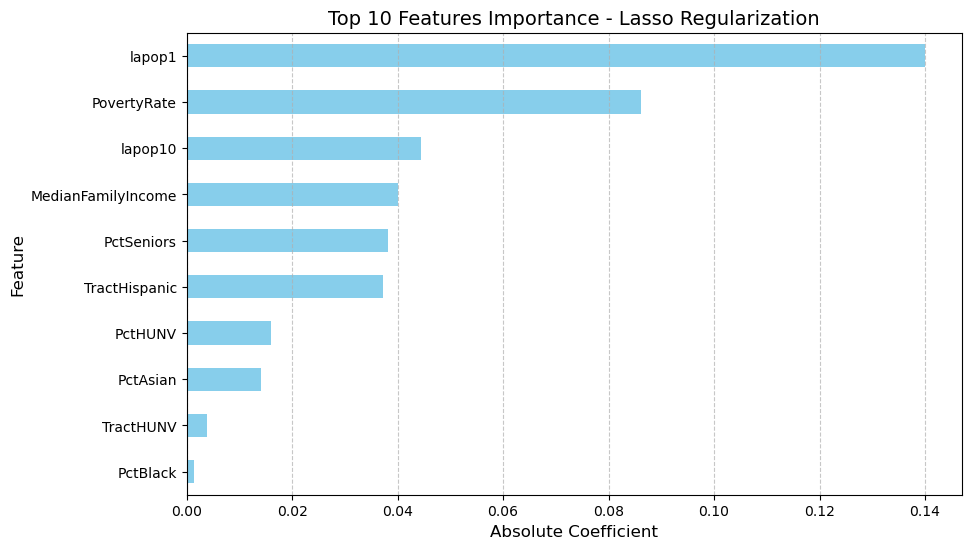

In [21]:
# Feature Importance Plot for Lasso Regularization
plt.figure(figsize=(10, 6))

# Calculate feature importance using absolute coefficients of Lasso
importance_lasso = pd.Series(np.abs(lasso.coef_), index=X_train.columns)

# Select top 10 features with largest absolute coefficients
top_10_importance_lasso = importance_lasso.nlargest(10)

# Create horizontal bar plot
top_10_importance_lasso.plot(kind='barh', color='skyblue')

# Add title and labels
plt.title('Top 10 Features Importance - Lasso Regularization', fontsize=14)
plt.xlabel('Absolute Coefficient', fontsize=12)
plt.ylabel('Feature', fontsize=12)

# Add grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Invert y-axis for better visualization
plt.gca().invert_yaxis()

# Show the plot
plt.show()

In [22]:
# Recursive Feature Elimination (RFE) #Ref: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
logreg = LogisticRegression(max_iter=10000)
rfe = RFE(estimator=logreg, n_features_to_select=10, step=1)
rfe.fit(X_train_scaled, y_train)

RFE(estimator=LogisticRegression(max_iter=10000), n_features_to_select=10)

In [23]:
# Feature Ranking from RFE
rfe_ranking = pd.Series(rfe.ranking_, index=X_train.columns)
selected_features_rfe = rfe_ranking[rfe_ranking == 1].index

In [24]:
importance_rf = rf.feature_importances_
importance_rf_series = pd.Series(importance_rf, index=X_train.columns)

# Get indices of top 10 features based on their importance
top_10_indices = np.argsort(importance_rf)[-10:]

# Extract top 10 feature names from X_train.columns
top_10_features = X_train.columns[top_10_indices]

# Output selected features from different techniques
print("Selected features using Random Forest Feature Importance:")
print(top_10_features)
print("\nSelected features using Univariate Feature Selection:")
print(selected_features)
print("\nSelected features using Lasso Regularization:")
print(importance_lasso.nlargest(10))
print("\nSelected features using Recursive Feature Elimination (RFE):")
print(selected_features_rfe)

Selected features using Random Forest Feature Importance:
Index(['TractBlack', 'Pop2010', 'OHU2010', 'TractKids', 'lapop1', 'TractHUNV',
       'PovertyRate', 'MedianFamilyIncome', 'TractSNAP', 'lapop10'],
      dtype='object')

Selected features using Univariate Feature Selection:
Index(['PovertyRate', 'TractSNAP', 'lapop1', 'lapop10', 'TractSeniors',
       'TractWhite', 'PctHUNV', 'PctSeniors', 'PctWhite', 'PctBlack'],
      dtype='object')

Selected features using Lasso Regularization:
lapop1                0.139950
PovertyRate           0.086166
lapop10               0.044398
MedianFamilyIncome    0.040148
PctSeniors            0.038137
TractHispanic         0.037156
PctHUNV               0.016067
PctAsian              0.014044
TractHUNV             0.003920
PctBlack              0.001337
dtype: float64

Selected features using Recursive Feature Elimination (RFE):
Index(['OHU2010', 'MedianFamilyIncome', 'TractSNAP', 'TractHUNV', 'lapop1',
       'lapop10', 'TractKids', 'TractBlack

### SVM

In [25]:
model = LinearSVC(penalty='l2', loss='hinge')

In [26]:
# Training on SVM
print("TRAIN on SVM")
roc_auc_train = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean()
accuracy_train = cross_val_score(model, X_train, y_train, cv=5).mean()
f1_train = cross_val_score(model, X_train, y_train, cv=5, scoring='f1').mean()
print("ROC_AUC score (Training): ", roc_auc_train)
print("Accuracy score (Training): ", accuracy_train)
print("F1 score (Training): ", f1_train)

# Testing on SVM
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.decision_function(X_test)

print("\nTEST on SVM")
roc_auc_test = roc_auc_score(y_test, y_pred_proba)
accuracy_test = accuracy_score(y_test, y_pred)
f1_test = f1_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred)

print("ROC_AUC score (Test): ", roc_auc_test)
print("Accuracy score (Test): ", accuracy_test)
print("F1 score (Test): ", f1_test)
print("Recall score (Test): ", recall_test)
print("Precision score (Test): ", precision_test)

TRAIN on SVM
ROC_AUC score (Training):  0.49742226737701856
Accuracy score (Training):  0.5972166998011929
F1 score (Training):  0.6377022032490045

TEST on SVM
ROC_AUC score (Test):  0.5457379985940725
Accuracy score (Test):  0.3354531001589825
F1 score (Test):  0.0
Recall score (Test):  0.0
Precision score (Test):  0.0


### KNN

In [27]:
# KNN
print("KNN")
print()
model = KNeighborsClassifier(n_neighbors=5)

# Train stats
print("TRAIN on KNN")
roc_auc_train = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean()
accuracy_train = cross_val_score(model, X_train, y_train, cv=5).mean()
f1_train = cross_val_score(model, X_train, y_train, cv=5, scoring='f1').mean()
recall_train = cross_val_score(model, X_train, y_train, cv=5, scoring='recall').mean()
precision_train = cross_val_score(model, X_train, y_train, cv=5, scoring='precision').mean()

print("ROC_AUC score (train): ", roc_auc_train)
print("Accuracy score (train): ", accuracy_train)
print("F1 score (train): ", f1_train)
print("Recall score (train): ", recall_train)
print("Precision score (train): ", precision_train)

# Predict and get test stats
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_predproba_knn = model.predict_proba(X_test)
fpr_knn, tpr_knn, thresholds = roc_curve(y_test.values, y_predproba_knn[:,1])

print()
print("TEST on KNN")
roc_auc_test = roc_auc_score(y_test, y_pred)
accuracy_test = accuracy_score(y_test, y_pred)
f1_test = f1_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred)

print("ROC_AUC score (test): ", roc_auc_test)
print("Accuracy score (test): ", accuracy_test)
print("F1 score (test): ", f1_test)
print("Recall score (test): ", recall_test)
print("Precision score (test): ", precision_test)


KNN

TRAIN on KNN
ROC_AUC score (train):  0.5987030330016755
Accuracy score (train):  0.6402691421193951
F1 score (train):  0.7439124650918179
Recall score (train):  0.7885885885885886
Precision score (train):  0.7041227592946261

TEST on KNN
ROC_AUC score (test):  0.584310301820903
Accuracy score (test):  0.6518282988871225
F1 score (test):  0.7508532423208192
Recall score (test):  0.7894736842105263
Precision score (test):  0.7158351409978309


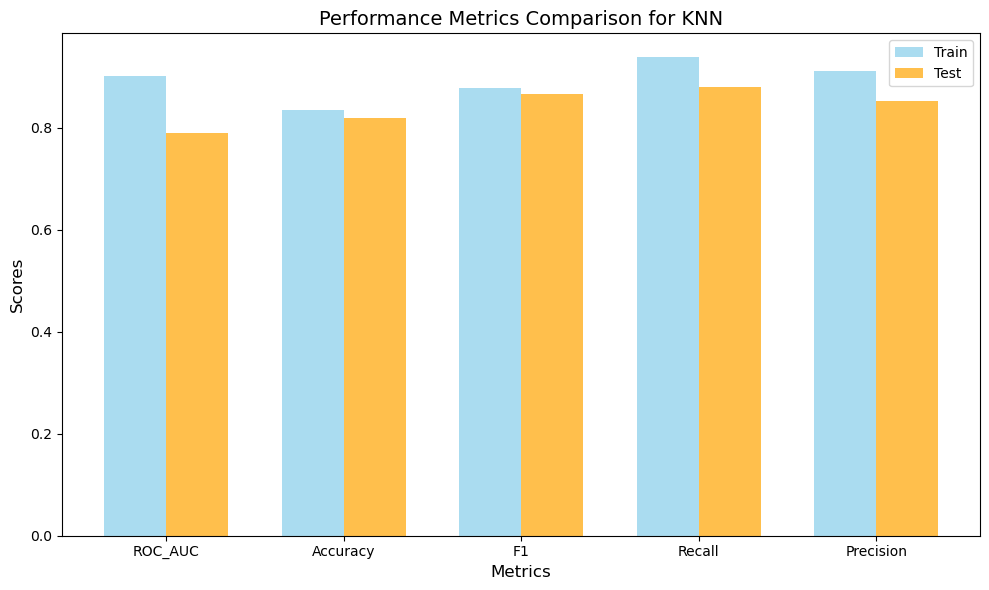

In [67]:
# Plot figure
plt.figure(figsize=(10, 6))

metrics = ['ROC_AUC', 'Accuracy', 'F1', 'Recall', 'Precision']
train_scores = [roc_auc_train, accuracy_train, f1_train, recall_train, precision_train]
test_scores = [roc_auc_test, accuracy_test, f1_test, recall_test, precision_test]

bar_width = 0.35
index = range(len(metrics))

plt.bar(index, train_scores, width=bar_width, color='skyblue', alpha=0.7, label='Train')
plt.bar([i + bar_width for i in index], test_scores, width=bar_width, color='orange', alpha=0.7, label='Test')

plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.title('Performance Metrics Comparison for KNN', fontsize=14)
plt.xticks([i + bar_width/2 for i in index], metrics)
plt.legend()
plt.tight_layout()
plt.savefig('../Images/performancem_metrics_KNN.png', dpi=200, bbox_inches='tight')

plt.show()

### Gradient Boosting

In [29]:
#initialize
model = GradientBoostingClassifier()
print("GRADIENT BOOSTING")
print()

print("TRAIN on GB")
print("ROC_AUC score: ", cross_val_score(model,X_train,y_train,cv=5,scoring='roc_auc').mean())
print("Accuracy score: ", cross_val_score(model,X_train,y_train,cv=5).mean())
print("f1 score: ", cross_val_score(model,X_train,y_train,cv=5,scoring='f1').mean())

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print()
print("TEST on GB")
print("ROC_AUC score: ", roc_auc_score(y_test,y_pred))
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("f1 score: ", f1_score(y_test,y_pred))
print("recall score: ", recall_score(y_test,y_pred))
print("precision score: ", precision_score(y_test,y_pred))

GRADIENT BOOSTING

TRAIN on GB
ROC_AUC score:  0.9022396569907883
Accuracy score:  0.8364506189951924
f1 score:  0.8787008050500471

TEST on GB
ROC_AUC score:  0.7909022880337424
Accuracy score:  0.8203497615262321
f1 score:  0.866902237926973
recall score:  0.8803827751196173
precision score:  0.8538283062645011


In [30]:
# Train on GB
print("TRAIN on GB")
roc_auc_train = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean()
accuracy_train = cross_val_score(model, X_train, y_train, cv=5).mean()
f1_train = cross_val_score(model, X_train, y_train, cv=5, scoring='f1').mean()
y_pred_train = model.fit(X_train, y_train).predict(X_train)
recall_train = recall_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)

print("ROC_AUC score (Train):", roc_auc_train)
print("Accuracy score (Train):", accuracy_train)
print("F1 score (Train):", f1_train)
print("Recall score (Train):", recall_train)
print("Precision score (Train):", precision_train)

# Test on GB
print()
print("TEST on GB")
y_pred_test = model.predict(X_test)
roc_auc_test = roc_auc_score(y_test, y_pred_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)

print("ROC_AUC score (Test):", roc_auc_test)
print("Accuracy score (Test):", accuracy_test)
print("F1 score (Test):", f1_test)
print("Recall score (Test):", recall_test)
print("Precision score (Test):", precision_test)

TRAIN on GB
ROC_AUC score (Train): 0.9019096506879312
Accuracy score (Train): 0.8360522126206902
F1 score (Train): 0.8777159498373613
Recall score (Train): 0.9387387387387387
Precision score (Train): 0.9124343257443083

TEST on GB
ROC_AUC score (Test): 0.7909022880337424
Accuracy score (Test): 0.8203497615262321
F1 score (Test): 0.866902237926973
Recall score (Test): 0.8803827751196173
Precision score (Test): 0.8538283062645011


## Random Forest Classifier

In [31]:
# Define preprocessing

#numerial data
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

#categorical data
categorical_features = X.select_dtypes(include=['object']).columns

In [32]:
#numeric transformer
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [33]:
#categorical transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='conatant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [34]:
#preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [35]:
#Define the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [36]:
#fit the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['CensusTract', 'Pop2010', 'OHU2010', 'PovertyRate',
       'MedianFamilyIncome', 'TractSNAP', 'TractHUNV', 'lapop1', 'lapop10',
       'TractKids', 'TractSeniors', 'TractWhite', 'TractBlack', 'TractAsian',
       'TractHispanic', 'PctHUNV', 'PctKids', 'PctSeniors', 'PctWhite',
       'PctBlack', 'PctAsian', 'PctHispanic'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='conatant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [37]:
#predict
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,

In [38]:
#evaluate
accuracy_score(y_test, y_pred)

0.8124006359300477

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.66      0.70       211
           1       0.84      0.89      0.86       418

    accuracy                           0.81       629
   macro avg       0.79      0.78      0.78       629
weighted avg       0.81      0.81      0.81       629



In [40]:
#Receiver Operating Characteristic (ROC) curve and compute the Area Under the Curve (AUC) score for a binary classification model.

In [41]:
#This line computes the False Positive Rate (FPR), True Positive Rate (TPR), and decision thresholds for different probability cutoffs.
#returns the predicted probabilities of the positive class from the model for the test set.
#Area Under the ROC Curve (ROC AUC) using the FPR and TPR 
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

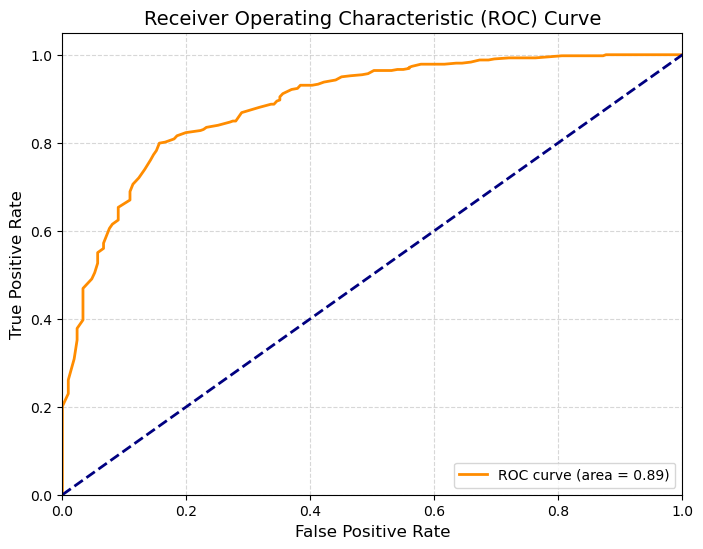

In [66]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.savefig('../Images/ROC_curve.png', dpi=200, bbox_inches='tight')

plt.show()

In [43]:
#extracts the feature importances from the trained classifier component of the model.
importances = model.named_steps['classifier'].feature_importances_
indices = np.argsort(importances)[::-1]

In [44]:
#print the feature ranking
print("Feature ranking: ")
for f in range(X_train.shape[1]):
    print(f"{f+1}. feature {X_train.columns[indices[f]]} ({importances[indices[f]]})")

Feature ranking: 
1. feature lapop10 (0.09606370037015939)
2. feature TractSNAP (0.09131224072889965)
3. feature MedianFamilyIncome (0.08758808691671487)
4. feature PovertyRate (0.06742080006874954)
5. feature TractHUNV (0.0617466597308532)
6. feature lapop1 (0.04973185022940362)
7. feature TractKids (0.048212178665686646)
8. feature OHU2010 (0.04797618929214113)
9. feature Pop2010 (0.044837299436045204)
10. feature TractBlack (0.041253986393402074)
11. feature PctHUNV (0.03937858255847499)
12. feature TractSeniors (0.03921678631126316)
13. feature TractAsian (0.03466995874543774)
14. feature TractWhite (0.0319306126364062)
15. feature PctWhite (0.03126525641563955)
16. feature CensusTract (0.0303865275494601)
17. feature PctAsian (0.02843897808855532)
18. feature TractHispanic (0.028430125884712464)
19. feature PctHispanic (0.02613647534298719)
20. feature PctKids (0.025589654105346814)
21. feature PctBlack (0.02460768229839319)
22. feature PctSeniors (0.023806368231267944)


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

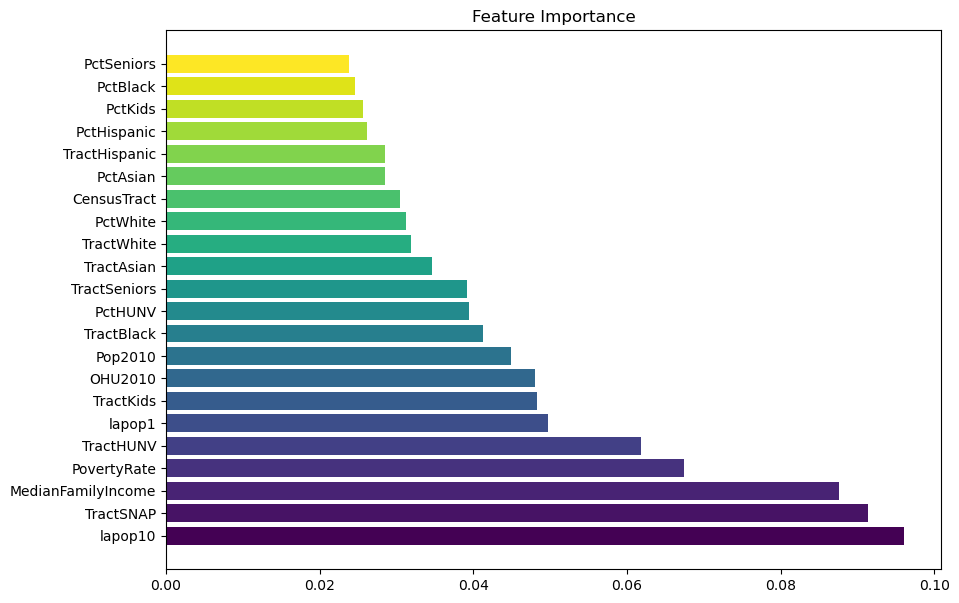

In [65]:
#plotting the features
feature_importances = model.named_steps['classifier'].feature_importances_
indices = np.argsort(feature_importances)[::-1]
names = [X.columns[i] for i in indices]

import matplotlib.cm as cm

# Define a colormap
colormap = cm.get_cmap('viridis')

# Plotting with gradient colors
plt.figure(figsize=(10, 7))
plt.title("Feature Importance")

# Plot horizontal bar chart with gradient colors
bars = plt.barh(range(X.shape[1]), feature_importances[indices], color=colormap(np.linspace(0, 1, len(indices))))
plt.yticks(range(X.shape[1]), names, rotation=0)
sm = cm.ScalarMappable(cmap=colormap)
sm.set_array(feature_importances[indices])
cbar = plt.colorbar(sm)
cbar.set_label('Importance')
plt.savefig('../Images/feature_importance.png', dpi=200, bbox_inches='tight')
plt.show();

In [46]:
scores = cross_val_score(model, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.80 (+/- 0.06)


Accuracy: The mean accuracy of the model across all folds. In this case, it's 0.80, which means that, on average, the model correctly predicts the target variable 80% of the time across all folds.

+/- 0.06: This represents the variability or standard deviation of the accuracy across the 5 folds. The value 0.06 indicates that the accuracy varies by approximately 6 percentage points (or 6%) around the mean accuracy of 80%.

In other words:

The accuracy of the model can range from 0.80 - 0.06 = 0.74 to 0.80 + 0.06 = 0.86.
The interval [0.74, 0.86] captures the range within which the accuracy of the model is expected to fall with 95% confidence.

In [47]:
#Decision tree for random forest classifier

rfc = model.named_steps['classifier']
estimator = rfc.estimators_[0]

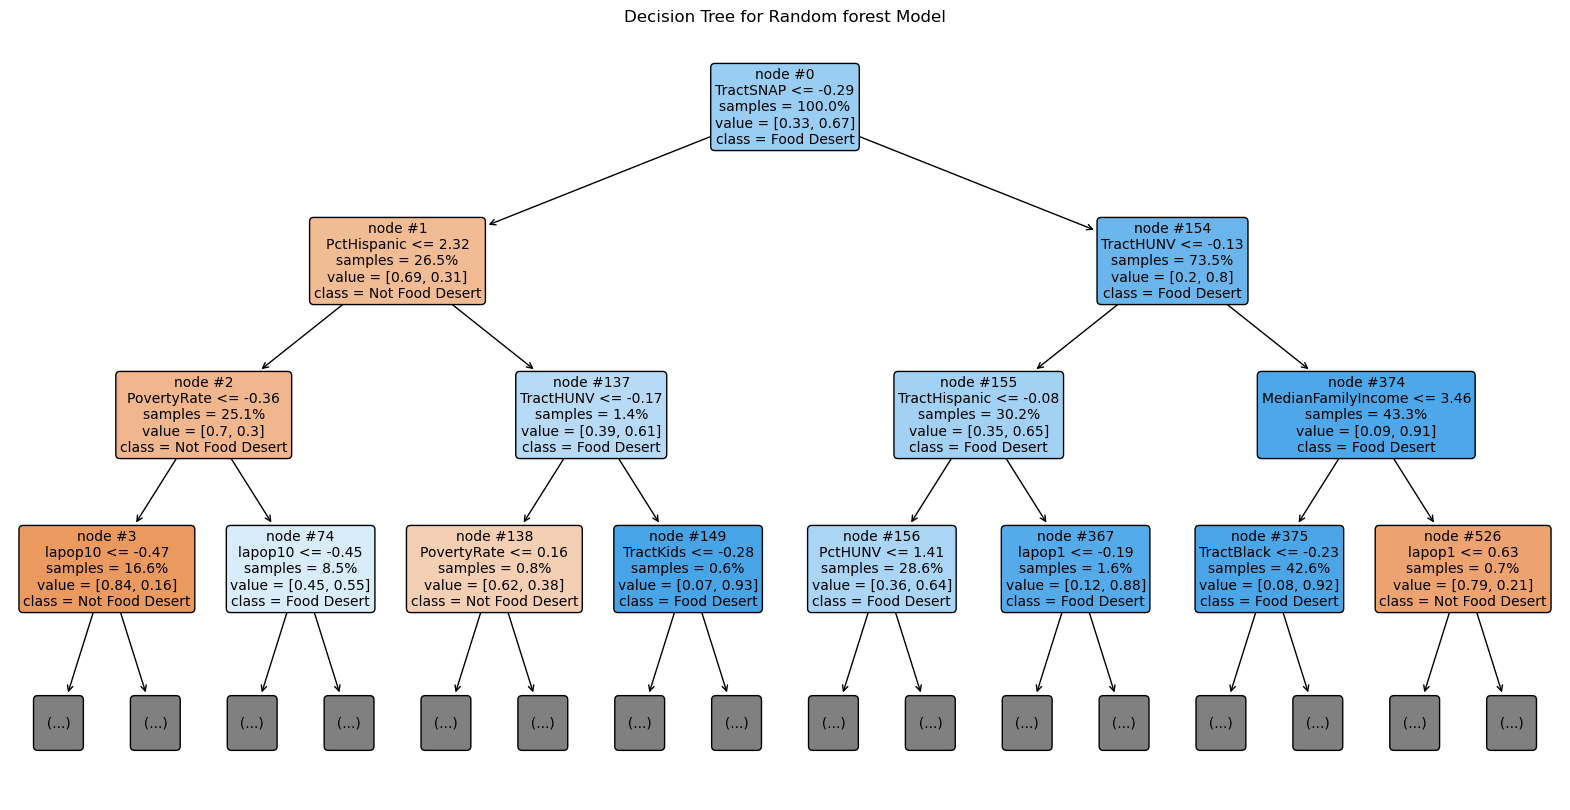

In [63]:
#plot
plt.figure(figsize=(20, 10))
plot_tree(estimator,
         filled=True,
         feature_names=X.columns,
         class_names=['Not Food Desert', 'Food Desert'],
         max_depth=3,
         fontsize=10,  # Adjust font size for better readability
          label="all",  # Show all node labels
          impurity=False,  # Hide impurity information
          proportion=True,  # Show proportion of samples for each class
          precision=2,  # Set precision for class proportions
          rounded=True,  # Round the corners of nodes
          node_ids=True)  # Show node IDs 
plt.title('Decision Tree for Random forest Model')
plt.savefig('../Images/decisiontree_rf.png', dpi=200, bbox_inches='tight')
plt.show();

### Geopandas

In [49]:
shapefile_path = '../Data/geodata/cb_2018_us_county_5m.shp'

In [50]:
gdf = gpd.read_file(shapefile_path)

In [51]:
# Displaying the first few rows of the GeoDataFrame
print(gdf.head())

  STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID      NAME LSAD  \
0      39      071  01074048  0500000US39071  39071  Highland   06   
1      06      003  01675840  0500000US06003  06003    Alpine   06   
2      12      033  00295737  0500000US12033  12033  Escambia   06   
3      17      101  00424252  0500000US17101  17101  Lawrence   06   
4      28      153  00695797  0500000US28153  28153     Wayne   06   

        ALAND     AWATER                                           geometry  
0  1432479992   12194983  POLYGON ((-83.86976 39.05553, -83.86568 39.247...  
1  1912292630   12557304  POLYGON ((-120.07248 38.50987, -120.07239 38.7...  
2  1701544502  563927612  POLYGON ((-87.62999 30.87766, -87.62946 30.880...  
3   963936864    5077783  POLYGON ((-87.91028 38.57493, -87.90811 38.850...  
4  2099745573    7255476  POLYGON ((-88.94317 31.78421, -88.94335 31.824...  


<Axes: >

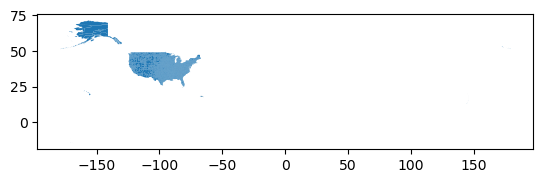

In [52]:
# Plotting the GeoDataFrame
gdf.plot()

In [53]:
gdf.head(5)

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,39,071,01074048,0500000US39071,39071,Highland,06,1432479992,12194983,"POLYGON ((-83.86976 39.05553, -83.86568 39.247..."
1,06,003,01675840,0500000US06003,06003,Alpine,06,1912292630,12557304,"POLYGON ((-120.07248 38.50987, -120.07239 38.7..."
2,12,033,00295737,0500000US12033,12033,Escambia,06,1701544502,563927612,"POLYGON ((-87.62999 30.87766, -87.62946 30.880..."
3,17,101,00424252,0500000US17101,17101,Lawrence,06,963936864,5077783,"POLYGON ((-87.91028 38.57493, -87.90811 38.850..."
4,28,153,00695797,0500000US28153,28153,Wayne,06,2099745573,7255476,"POLYGON ((-88.94317 31.78421, -88.94335 31.824..."


In [54]:
#merging geodf and county_aggr

In [55]:
#Formatting the county name to match the GeoDataFrame
county_aggr['CensusTract'] = county_aggr['CensusTract'].astype(str)

# Extract and generate the FIPS code (the first 5 digits of CensusTract)
county_aggr['FIPS'] = county_aggr['CensusTract'].str[:5]

In [56]:
# Merging on GEOID and FIPS
merged_gdf = gdf.merge(county_aggr, left_on='GEOID', right_on='FIPS', how='left')

merged_gdf.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,...,TractHispanic,PctHUNV,PctKids,PctSeniors,PctWhite,PctBlack,PctAsian,PctHispanic,is_food_desert,FIPS
0,39,071,01074048,0500000US39071,39071,Highland,06,1432479992,12194983,"POLYGON ((-83.86976 39.05553, -83.86568 39.247...",...,319.0,8.201042,25.446787,15.182730,96.450939,1.385671,0.234004,0.731836,1.0,39071
1,06,003,01675840,0500000US06003,06003,Alpine,06,1912292630,12557304,"POLYGON ((-120.07248 38.50987, -120.07239 38.7...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12,033,00295737,0500000US12033,12033,Escambia,06,1701544502,563927612,"POLYGON ((-87.62999 30.87766, -87.62946 30.880...",...,14061.0,5.955884,21.555747,14.424146,68.877659,22.942756,2.746464,4.724497,1.0,12033
3,17,101,00424252,0500000US17101,17101,Lawrence,06,963936864,5077783,"POLYGON ((-87.91028 38.57493, -87.90811 38.850...",...,553.0,5.236542,19.051862,15.938929,87.304699,9.552664,0.225747,3.285214,1.0,17101
4,28,153,00695797,0500000US28153,28153,Wayne,06,2099745573,7255476,"POLYGON ((-88.94317 31.78421, -88.94335 31.824...",...,246.0,5.848963,26.191739,13.900805,59.285680,38.902010,0.163879,1.185714,1.0,28153


In [57]:
#saving this df but not using it
merged_gdf.to_csv('../csv_data/merged_geo_county.csv')

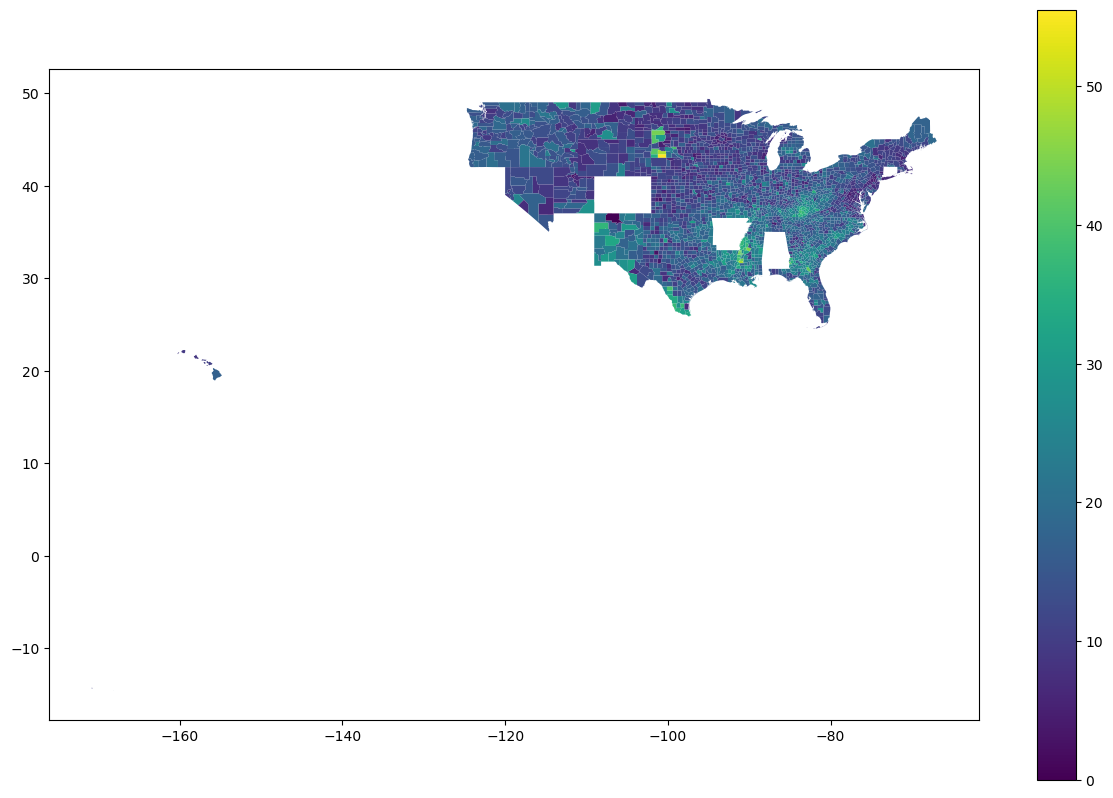

In [60]:
# Plotting tests: PovertyRate by County
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_gdf.plot(column='PovertyRate', ax=ax, legend=True)
plt.show()

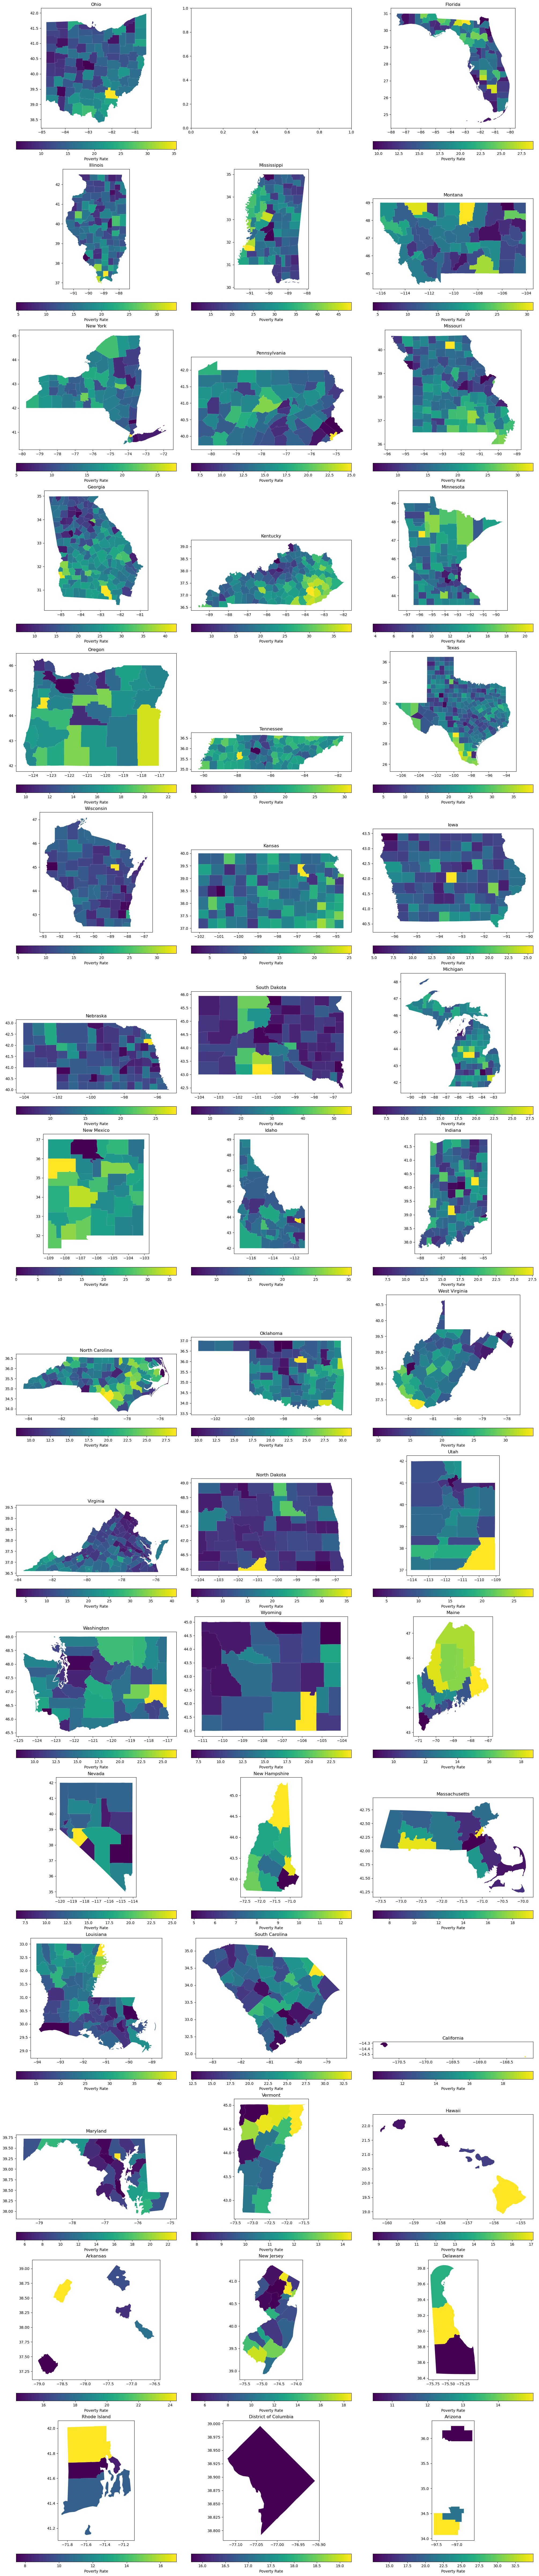

In [62]:
#Ref: https://geopandas.org/en/stable/docs/user_guide/mapping.html

#Variable to store unique states
states = merged_gdf['State'].unique()

# Calculate grid size
n = len(states)
cols = 3  # Set number of columns in the grid
rows = math.ceil(n / cols)  # Calculate required rows

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 6), constrained_layout=True)
axes = axes.flatten() 

for i, state in enumerate(states):
    state_gdf = merged_gdf[merged_gdf['State'] == state]
    
    # Check if the state_gdf is empty, continue to the next state if true
    if state_gdf.empty:
        continue
    
    state_gdf.plot(column='PovertyRate', ax=axes[i], legend=True,
                   missing_kwds={
                       "color": "lightgrey",
                       "edgecolor": "red",
                       "hatch": "///",
                       "label": "Missing values"},
                   legend_kwds={'label': "Poverty Rate",
                                'orientation': "horizontal"})
    axes[i].set_title(state)
    
for j in range(i + 1, rows * cols):
    axes[j].axis('off')
plt.savefig('../Images/geopandas_state.png', dpi=200, bbox_inches='tight')
plt.show()